In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Domestic', 'Government', min_assets=.8)
equities = screen_funds('Equities', 'Domestic', 'Large-Cap', min_assets=.8)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 90, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

22 92
from 2019-04-22 to 2019-07-18 - 114


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

110


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
EDV,58,0.158961,0.324649,0.463970,10.761886,4.117647
MTUM,58,0.149058,0.336951,0.417642,9.549155,2.859384
USMV,58,0.125347,0.271147,0.431552,8.063458,2.180427
TLT,58,0.120416,0.239650,0.467695,8.061433,3.084717
VGLT,58,0.120189,0.233829,0.478366,8.013909,2.936891
SPTL,58,0.119960,0.230580,0.484113,8.033356,2.930501
SPLV,58,0.118867,0.280658,0.393836,7.968359,2.660443
FPX,58,0.111739,0.387682,0.266728,7.142603,5.445800
ADX,58,0.099911,0.333519,0.274578,6.309443,5.318352


evicted VTIP 0.894 -0.080
evicted SPTS 0.808 -0.400
evicted SCHP 0.807 -0.319
evicted CET 0.851 -0.375
evicted MBB 0.776 -0.239
evicted USMV 0.813 -0.379
retry backlogs ['ITOT', 'SCHV', 'VYM', 'VONG', 'TDTT', 'DGRO', 'VTV', 'SPLG', 'SPTM', 'SCHB', 'SPYV', 'FNDX', 'SCHX', 'QDF', 'MGC', 'IPE', 'SPTL', 'TLT', 'IWV', 'IVE', 'VOO', 'VTI', 'IWB', 'VOOG', 'IUSG', 'VV', 'IVV', 'VONE', 'SPY', 'VMBS', 'IWD', 'STIP', 'MGV', 'DSI', 'HDV', 'DLN', 'FEX', 'VOOV', 'VGSH', 'RSP', 'PRF', 'GSLC', 'VUG', 'IEI', 'VONV', 'VGIT', 'QUAL', 'IYY', 'SPYG', 'IEF', 'SCHR', 'SHY', 'TIP', 'GOVT', 'SCHO', 'OEF', 'SDY', 'NOBL', 'SUSA', 'SCHK', 'IWY', 'IVW', 'DGRW', 'SPLV', 'LRGF', 'XLG', 'IUSV', 'CFO', 'PKW', 'JHML', 'FTCS', 'VGLT', 'SCHG', 'MGK', 'RPG', 'SPHQ', 'JKD', 'VIG', 'FTC', 'IWF', 'DTN', 'SPYD', 'TLH', 'FVD', 'TILT', 'DHS', 'DVY', 'SPHD', 'QQQ', 'ONEQ', 'FV', 'MOAT', 'MTUM', 'PWV', 'DIA', 'JKE', 'FPX', 'SDOG', 'VLUE', 'FDL', 'RWL', 'USA'] at 0.905/-0.51 - 0.631
evicted STIP 0.888 -0.082
evicted SHY 0.816 -0.3

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,58.0,0.119926,0.133332,-0.332651,0.043326,0.132318,0.218530,0.411444,0.836958,7.914711,1.650593
TLH,58.0,0.094709,0.163267,-0.399220,-0.011030,0.106606,0.190871,0.533710,0.529046,6.300769,1.980536
EDV,58.0,0.158961,0.324649,-0.834994,0.019700,0.132428,0.322175,1.027232,0.463970,10.761886,4.117647
ADX,58.0,0.099911,0.333519,-0.664982,-0.119586,0.131859,0.300066,1.029532,0.274578,6.309443,5.318352


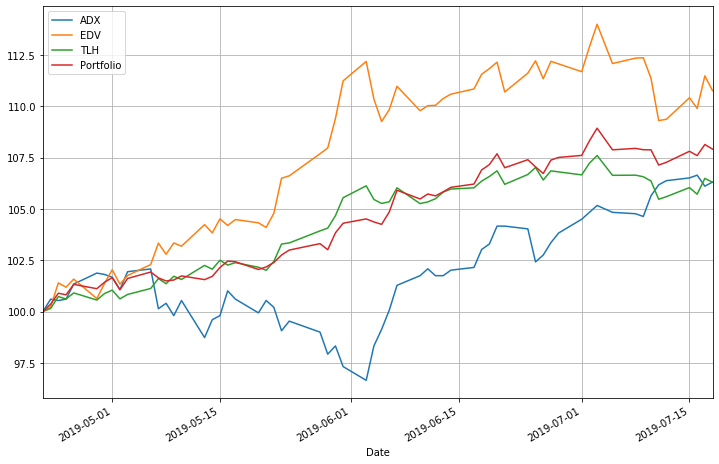

In [6]:
bounds = .08, .12
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(_lambda=1, bounds=bounds)
quote.setup_mask(['ADX', 'EDV', 'TLH'])
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

{'EDV': 0.51, 'MTUM': 0.49}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,58.0,0.153731,0.177582,-0.416860,0.040062,0.183725,0.278887,0.583452,0.818766,10.167648,2.065794
EDV,58.0,0.158961,0.324649,-0.834994,0.019700,0.132428,0.322175,1.027232,0.463970,10.761886,4.117647
MTUM,58.0,0.149058,0.336951,-0.476787,-0.068181,0.143408,0.353391,1.172438,0.417642,9.549155,2.859384


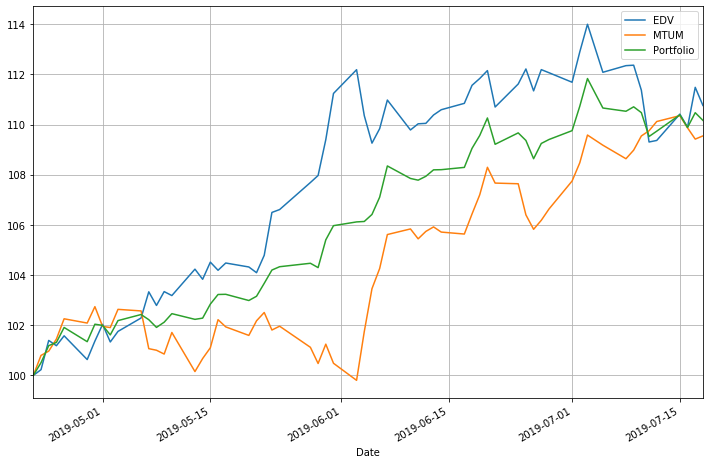

In [7]:
quote.setup_mask(['EDV', 'MTUM'])
ratio = {'EDV': round(stats['std']['MTUM'] / (stats['std']['EDV'] + stats['std']['MTUM']), 2),
         'MTUM': round(stats['std']['EDV'] / (stats['std']['EDV'] + stats['std']['MTUM']), 2)}
print(ratio)
quote.graph(ratio)